# Norfolk, Virginia Case Study
## Gathering data from hydroshare

Download data for norfolk using hydroshare. This requires a username and password on Hydroshare. The data will be saved to a path like `C:\Users\AppData\Local\TRITON_SWMM_toolkit\examples\norfolk_coastal_flooding\data\contents`. The data can be downloaded manually here: https://www.hydroshare.org/resource/a4aace329b8c401a93e94ce2a761fe1b/

In [1]:
from TRITON_SWMM_toolkit.examples import load_norfolk_system_config
cfg_system = load_norfolk_system_config(download_if_exists=False)

/home/dcl3nd/miniconda3/envs/triton_swmm_toolkit/lib/python3.11/site-packages/rdflib/plugin.py:111: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import iter_entry_points


In [2]:
import pandas as pd
pd.DataFrame(cfg_system, columns = ["desc", "val"])

,desc,val
0,variable_boundary_condition,/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/...
1,system_directory,/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/...
2,watershed_shapefile,/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/...
3,DEM_fullres,/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/...
4,landuse_lookup_file,/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/...
5,SWMM_hydraulics,/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/...
6,SWMM_hydrology,/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/...
7,SWMM_full,/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/...
8,landuse_raster,/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/...
9,TRITONSWMM_software_directory,/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/...


In [13]:
# define local vars
landuse_lookup = cfg_system.landuse_lookup_file
landuse_raster = cfg_system.landuse_raster
landuse_colname = cfg_system.landuse_lookup_class_id_colname
mannings_colname = cfg_system.landuse_lookup_mannings_colname
landuse_description_colname = cfg_system.landuse_description_colname
landuse_plot_color_colname = cfg_system.landuse_plot_color_colname
watershed_shapefile = cfg_system.watershed_shapefile
system_directory = cfg_system.system_directory
# mannings_processed = cfg_system.mannings_file
dem_unprocessed = cfg_system.DEM_fullres
target_resolution = cfg_system.target_dem_resolution
# dem_processed = cfg_system.DEM_processed
dem_outside_watershed_height = cfg_system.dem_outside_watershed_height
dem_building_height = cfg_system.dem_building_height
weather_timeseries = cfg_system.weather_timeseries
weather_event_summaries = cfg_system.weather_event_summary_csv
weather_event_indices = cfg_system.weather_event_indices
weather_time_series_storm_tide_datavar = cfg_system.weather_time_series_storm_tide_datavar
# weather_time_series_rain_datavars = cfg_system.weather_time_series_rain_datavars
subcatchment_raingage_mapping = cfg_system.subcatchment_raingage_mapping
weather_time_series_timestep_dimension_name = cfg_system.weather_time_series_timestep_dimension_name
subcatchment_raingage_mapping_gage_id_colname = cfg_system.subcatchment_raingage_mapping_gage_id_colname
rainfall_units = cfg_system.rainfall_units
storm_tide_units = cfg_system.storm_tide_units
SWMM_hydrology = cfg_system.SWMM_hydrology
SWMM_hydraulics = cfg_system.SWMM_hydraulics
SWMM_full = cfg_system.SWMM_full
variable_boundary_condition = cfg_system.variable_boundary_condition
TRITON_output_type = cfg_system.TRITON_output_type
use_constant_mannings = cfg_system.use_constant_mannings
constant_mannings = cfg_system.constant_mannings
triton_swmm_configuration_template = cfg_system.triton_swmm_configuration_template
manhole_diameter = cfg_system.manhole_diameter
manhole_loss_coefficient = cfg_system.manhole_loss_coefficient
hydraulic_timestep_s = cfg_system.hydraulic_timestep_s
TRITON_reporting_timestep_s = cfg_system.TRITON_reporting_timestep_s
open_boundaries = cfg_system.open_boundaries
TRITONSWMM_software_directory = cfg_system.TRITONSWMM_software_directory
TRITON_SWMM_software_compilation_script = cfg_system.TRITON_SWMM_software_compilation_script

## Preparing TRITON-SWMM inputs (system set up)
### Generating TRITON-ready manning's and DEM files

Not that the DEM that is input to this process already has elevations of 9999 $m$ assigned outside of the watershed aside from a corridor connecting the watershed to the variable water level boundary condition. Also, elevations of 80 $m$ were assigned to grid cells overlapping with buildings.

In [4]:
from TRITON_SWMM_toolkit.system_setup import create_mannings_file_for_TRITON, create_dem_for_TRITON
from TRITON_SWMM_toolkit.plot import plot_fullres_vs_coarse_dem, plot_fullres_vs_coarse_mannings



In [5]:

rds_dem_coarse = create_mannings_file_for_TRITON(
    landuse_lookup,
    landuse_raster,
    landuse_colname,
    mannings_colname,
    dem_unprocessed,
    target_resolution,
    system_directory,
    include_metadata = False, # sometimes the header in the DEM file causes TRITON-SWMM to misread the file
)

rds_mannings_coarse = create_dem_for_TRITON(dem_unprocessed, target_resolution, system_directory)

# plot_fullres_vs_coarse_dem(dem_outside_watershed_height, dem_building_height, dem_unprocessed, system_directory=system_directory, vmin = 0, vmax = None, watershed_shapefile=watershed_shapefile)
# plot_fullres_vs_coarse_mannings(landuse_lookup, landuse_raster, landuse_colname, mannings_colname,system_directory, watershed_shapefile=watershed_shapefile)

#  set up experiment

In [14]:
from TRITON_SWMM_toolkit.examples import load_norfolk_single_sim_experiment
from TRITON_SWMM_toolkit.prepare_an_experiment import compile_TRITON_SWMM
cfg_exp_1sim = load_norfolk_single_sim_experiment()
experiment_id = cfg_exp_1sim.experiment_id
TRITON_SWMM_make_command = cfg_exp_1sim.TRITON_SWMM_make_command

In [15]:
compile_TRITON_SWMM(
    experiment_id,
    system_directory,
    TRITONSWMM_software_directory,
    TRITON_SWMM_make_command,
    TRITON_SWMM_software_compilation_script,
)

-- The C compiler identification is GNU 13.3.0
-- The CXX compiler identification is GNU 13.3.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Performing Test COMPILER_HAS_HIDDEN_VISIBILITY
-- Performing Test COMPILER_HAS_HIDDEN_VISIBILITY - Success
-- Performing Test COMPILER_HAS_HIDDEN_INLINE_VISIBILITY
-- Performing Test COMPILER_HAS_HIDDEN_INLINE_VISIBILITY - Success
-- Performing Test COMPILER_HAS_DEPRECATED_ATTR
-- Performing Test COMPILER_HAS_DEPRECATED_ATTR - Success
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenMP_CXX: -fopenmp (found version "4.5") 
-- Found OpenMP: TRUE (found version "4.5")  
-- Co

In file included from src/main.cpp:42:
src/string_utils.h: In function ‘std::string& StringUtils::ltrim(std::string&)’:
src/string_utils.h:127:101: warning: ‘std::pointer_to_unary_function<_Arg, _Result> std::ptr_fun(_Result (*)(_Arg)) [with _Arg = int; _Result = int]’ is deprecated: use 'std::function' instead [-Wdeprecated-declarations]
  127 |                 s.erase(s.begin(), std::find_if(s.begin(), s.end(), std::not1(std::ptr_fun<int, int>(std::isspace))));
      |                                                                               ~~~~~~~~~~~~~~~~~~~~~~^~~~~~~~~~~~~~
In file included from /usr/include/c++/13/string:49,
                 from /usr/include/c++/13/bits/locale_classes.h:40,
                 from /usr/include/c++/13/bits/ios_base.h:41,
                 from /usr/include/c++/13/ios:44,
                 from /usr/include/c++/13/ostream:40,
                 from /usr/include/c++/13/iostream:41,
                 from src/main.cpp:20:
/usr/include/c++/13/bits/stl

Building finished: triton
make[1]: Leaving directory '/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/examples/norfolk_coastal_flooding/data/contents/system/norfolk_irene_singlesim/compiled_software'


# set up simulation

In [8]:
from TRITON_SWMM_toolkit.examples import load_norfolk_single_sim_experiment
from TRITON_SWMM_toolkit.prepare_a_simulation import (
    prepare_simulation
)

weather_event_indexers = cfg_exp_1sim.weather_event_indexers
overwrite_scenario = False

In [9]:
log = prepare_simulation(
    overwrite_scenario,
    system_directory,
    experiment_id,
    weather_event_indexers,
    weather_timeseries,
    subcatchment_raingage_mapping,
    subcatchment_raingage_mapping_gage_id_colname,
    rainfall_units,
    storm_tide_units,
    weather_time_series_storm_tide_datavar,
    SWMM_hydrology,
    weather_time_series_timestep_dimension_name,
    SWMM_hydraulics,
    SWMM_full,
    variable_boundary_condition,
    use_constant_mannings,
    manhole_diameter,
    manhole_loss_coefficient,
    TRITON_output_type,
    constant_mannings,
    hydraulic_timestep_s,
    TRITON_reporting_timestep_s,
    open_boundaries,
    triton_swmm_configuration_template,
)

from TRITON_SWMM_toolkit.plot import print_json_file_tree
print_json_file_tree(log["logfile"])

/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/examples/norfolk_coastal_flooding/data/contents/system/simulations
├── log_scenario_creation.json
├── dats
│   ├── year.9_event_type.compound_event_id.1_grid-ind156.dat
│   ├── year.9_event_type.compound_event_id.1_grid-ind171.dat
│   ├── year.9_event_type.compound_event_id.1_grid-ind170.dat
│   ├── year.9_event_type.compound_event_id.1_grid-ind155.dat
│   ├── year.9_event_type.compound_event_id.1_grid-ind140.dat
│   ├── year.9_event_type.compound_event_id.1_grid-ind141.dat
│   └── year.9_event_type.compound_event_id.1_waterlevel.dat
├── swmm
│   ├── year.9_event_type.compound_event_id.1_hydro.inp
│   ├── year.9_event_type.compound_event_id.1_hydraulics.inp
│   └── year.9_event_type.compound_event_id.1_full.inp
├── extbc
│   ├── year.9_event_type.compound_event_id.1.txt
│   └── year.9_event_type.compound_event_id.1.extbc
├── strmflow
│   ├── year.9_event_type.compound_event_id.1.hyg
│   └── year.9_event_type.compound_event_id.1.txt
├── year

# running a simulation

In [ ]:
from TRITON_SWMM_toolkit.prepare_a_simulation import *
from TRITON_SWMM_toolkit.prepare_an_experiment import *
from TRITON_SWMM_toolkit.utils import replace_substring_in_file

sys_paths = define_system_paths(system_directory)
exp_paths = define_experiment_paths(experiment_id, system_directory)
simulation_folder = exp_paths["simulation_directory"]
sim_paths = define_simulation_paths(simulation_folder, weather_event_indexers)

{'compiled_software_directory': PosixPath('/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/examples/norfolk_coastal_flooding/data/contents/system/norfolk_irene_singlesim/compiled_software'),
 'TRITON_build_dir': PosixPath('/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/examples/norfolk_coastal_flooding/data/contents/system/norfolk_irene_singlesim/compiled_software/build'),
 'compilation_script': PosixPath('/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/examples/norfolk_coastal_flooding/data/contents/system/norfolk_irene_singlesim/compiled_software/compile.sh'),
 'simulation_directory': PosixPath('/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/examples/norfolk_coastal_flooding/data/contents/system/simulations')}

## simplest - 1 core

In [ ]:
exe = sim_paths["sim_tritonswmm_executable"]
cfg = sim_paths["triton_swmm_cfg"]
# reduce sim duration for testing
old_substring = "sim_duration=260760"
new_substring = "sim_duration=245"
replace_substring_in_file(cfg, old_substring, new_substring)

In [ ]:
# check on filepaths


In [ ]:
import os

swmm_path = exp_paths["compiled_software_directory"] / "Stormwater-Management-Model" / "build" / "bin:"

env = os.environ.copy()
env["LD_LIBRARY_PATH"] = (
    str(swmm_path) + env.get("LD_LIBRARY_PATH", "")
)


In [ ]:
from datetime import datetime

def current_datetime_string():
    return datetime.now().strftime("%Y%m%d_%H%M%S")

current_datetime_string()

log = load_json(sim_paths['f_log'])

tritonswmm_logfile_dir = sim_paths["tritonswmm_logfile_dir"]
tritonswmm_logfile = tritonswmm_logfile_dir / f"{current_datetime_string()}.log"

PosixPath('/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/examples/norfolk_coastal_flooding/data/contents/system/simulations/tritonswmm_sim_logfiles/20260103_170823.log')

In [ ]:
# Run the subprocess and stream output live
with subprocess.Popen(
    [exe, cfg],
    stdout=subprocess.PIPE,
    stderr=subprocess.STDOUT,  # merge stderr into stdout
    text=True,
    env=env
) as proc:
    with open(tritonswmm_logfile, "w", encoding="utf-8") as log:
        for line in proc.stdout:
            print(line, end="")   # live print to terminal
            log.write(line)       # write to log

    proc.wait()
    print("Return code:", proc.returncode)

FileNotFoundError: [Errno 2] No such file or directory: '/home/dcl3nd/.local/share/TRITON_SWMM_toolkit/examples/norfolk_coastal_flooding/data/contents/system/simulations/tritonswmm_sim_logfiles/20260103_170823.log'

In [ ]:
# simplest
result = subprocess.run(
    [exe, cfg],
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True,
    check=False,
    env=env,
)

print(result.stdout)
print(result.stderr)
print("Return code:", result.returncode)

# Testing (will be moved or removed in future docs)

<Axes: >

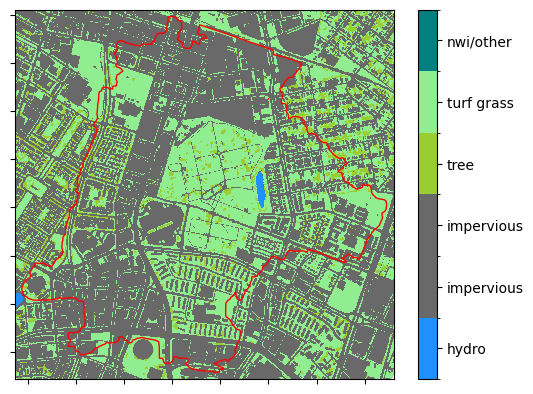

In [ ]:
from TRITON_SWMM_toolkit.plot import plot_landuse_raster

plot_landuse_raster(
    landuse_raster,
    landuse_lookup,
    landuse_colname,
    landuse_description_colname,
    landuse_plot_color_colname,
    watershed_shapefile,
    watershed_shapefile_color = "red"
)